# Init

In [1]:
import pandas as pd
import pythermalcomfort as ptc
import seaborn as sns
import scipy as scp

In [2]:
# loading excel data into dataframe variable
data_master = pd.read_excel("../0_dataset_master/Experiment_edited_V5b.xlsx")

# Percentage Plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ZENI\AppData\Local\Temp\ipykernel_4420\4041602101.py:41: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Local\Temp\ipykernel_4420\4041602101.py:41: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Local\Temp\ipykernel_4420\4041602101.py:41: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
C:\Users\ZENI\AppData\Local\Temp\ipykernel_4420\4041602101.py:41: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.con

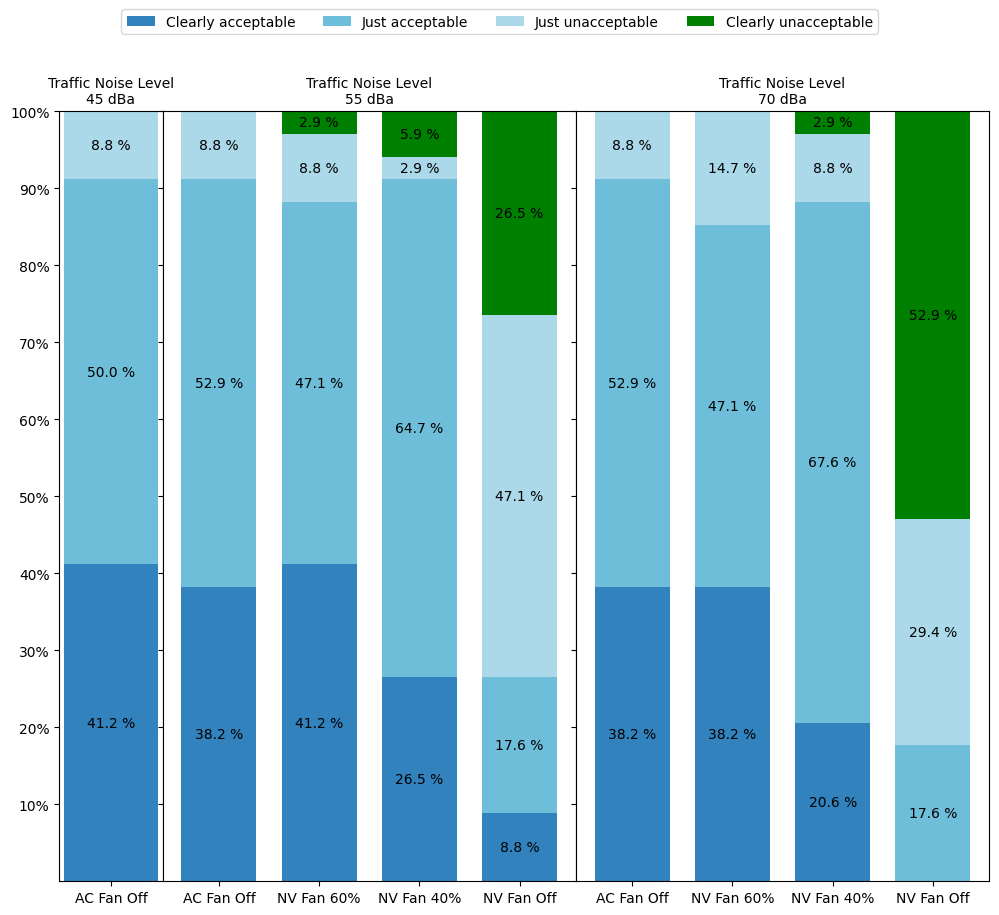

In [19]:
# Prepare the data
x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
x_labels = ['AC Fan Off', 'NV Fan 60%', 'NV Fan 40%', 'NV Fan Off']
y = [4,3,2,1]
colors = [
    ("#3182bd"),
    ("#6ebed9"),
    ("#abd9e9"),
    (0,0.5,0,1),
    ("#ffff99"),
    ("#e6550d"),
    ('#B22222'),
]
labels = ['Clearly unacceptable', 'Just unacceptable', 'Just acceptable', 'Clearly acceptable']
tnl = [45,55,70]

data_y = {}

for tf in tnl:
    data_y[tf] = {}
    for item in y:
        for group in x:
            # print(tf, item, )
            data_slice = data_master[(data_master['ThermalAcceptability']==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
            res = len(data_slice)

            if data_y[tf].get(item, None):
                data_y[tf][item].append(res)
            else:
                data_y[tf][item] = []
                data_y[tf][item].append(res)
        data_y[tf][item] = np.array(data_y[tf][item])

# memo of sample number
for tf in tnl:
    snum = data_y[tf][4]
    for item in y:
        snum = snum + data_y[tf][item]
    snum = snum - data_y[tf][4]
    for item in y:
        data_y[tf][item] = data_y[tf][item]/snum*100

# stack bars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
fig.set_figwidth(12)
fig.set_figheight(10)
ax1.set_title('Traffic Noise Level\n45 dBa', fontsize=10)
ax2.set_title('Traffic Noise Level\n55 dBa', fontsize=10)
ax3.set_title('Traffic Noise Level\n70 dBa', fontsize=10)
plt.ylim(0,100)
plt.subplots_adjust(wspace=0)
plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
bar_width = 0.75

# loop for tnl 55
for index, item in enumerate(y):
    data_y[55][list(data_y[55].keys())[index-1]]
    if index == 0:
        ax2.bar(x_labels, data_y[55][item], label=labels[item-1], color = colors[index], width=bar_width)
        sbot = data_y[55][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[item-1], color = colors[index], width=bar_width)
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[55][item]

# loop for tnl 70
for index, item in enumerate(y):
    data_y[70][list(data_y[70].keys())[index-1]]
    if index == 0:
        ax3.bar(x_labels, data_y[70][item], label=labels[item-1], color = colors[index], width=bar_width)
        sbot = data_y[70][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[item-1], color = colors[index], width=bar_width)
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
            if yval > 0:
                ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[70][item]

# loop for tnl 45
for index, item in enumerate(y):
    data_y[45][list(data_y[45].keys())[index-1]]
    if index == 0:
        ax1.bar(x_labels, data_y[45][item], label=labels[item-1], color = colors[index], width=bar_width)
        sbot = data_y[45][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[item-1], color = colors[index], width=bar_width)
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[45][item]

plt.legend(bbox_to_anchor=(-1.1,1.1), loc='lower left', ncol=4, borderaxespad=0.)
plt.show()

c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(self._x))
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(self._x))
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

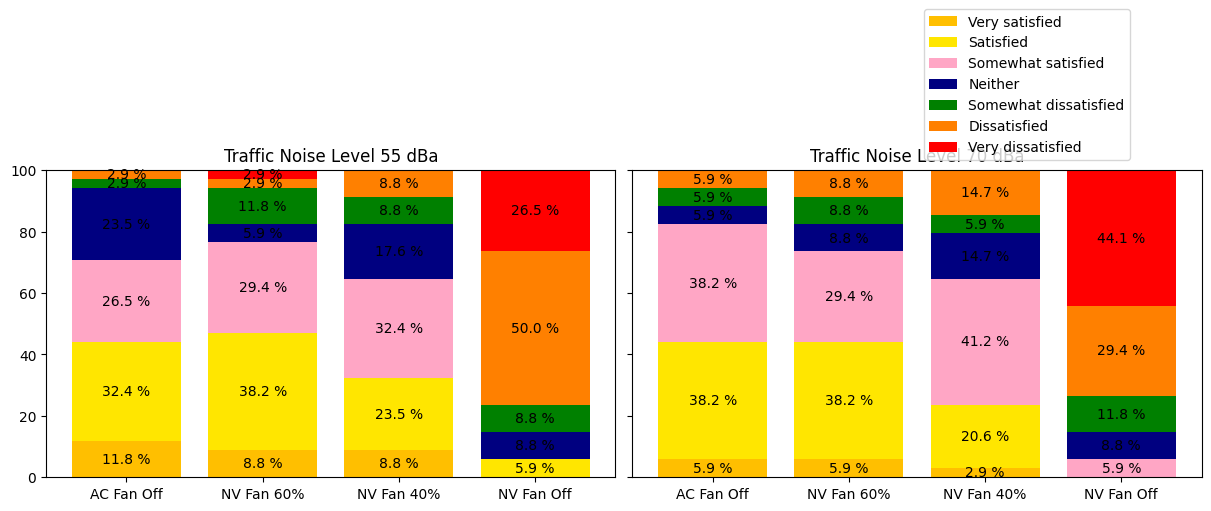

In [24]:
# Prepare the data
x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
x_labels = ['AC Fan Off', 'NV Fan 60%', 'NV Fan 40%', 'NV Fan Off']
# should be change
y = [7,6,5,4,3,2,1]
colors = [
    (1,0.75,0,1),
    (1,0.9,0,1),
    (1,0,0.35,0.35),
    (0,0,0.5,1),
    (0,0.5,0,1),
    (1,0.5,0,1),
    (1,0,0,1),
]
labels = ['Very dissatisfied', 'Dissatisfied', 'Somewhat dissatisfied', 'Neither', 'Somewhat satisfied', 'Satisfied', 'Very satisfied']
# 
tnl = [55,70]

data_y = {}

for tf in tnl:
    data_y[tf] = {}
    for item in y:
        for group in x:
            # print(tf, item, )
            data_slice = data_master[(data_master['ThermalSatisfaction']==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
            res = len(data_slice)

            if data_y[tf].get(item, None):
                data_y[tf][item].append(res)
            else:
                data_y[tf][item] = []
                data_y[tf][item].append(res)
        data_y[tf][item] = np.array(data_y[tf][item])

# memo of sample number
for tf in tnl:
    snum = data_y[tf][4]
    for item in y:
        snum = snum + data_y[tf][item]
    snum = snum - data_y[tf][4]
    for item in y:
        data_y[tf][item] = data_y[tf][item]/snum*100

# stack bars
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
fig.set_figwidth(12)
fig.set_figheight(5)
ax1.set_title('Traffic Noise Level 55 dBa')
ax2.set_title('Traffic Noise Level 70 dBa')
plt.ylim(0,100)

for index, item in enumerate(y):
    data_y[55][list(data_y[55].keys())[index-1]]
    if index == 0:
        ax1.bar(x_labels, data_y[55][item], label=labels[item-1], color = colors[index])
        sbot = data_y[55][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax1.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[item-1], color = colors[index])
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[55][item]
        
# add text annotation corresponding to the "total" value of each bar
# for xpos, ypos, yval in zip(x, y1+y2+y3, snum):
#     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")


for index, item in enumerate(y):
    data_y[70][list(data_y[70].keys())[index-1]]
    if index == 0:
        ax2.bar(x_labels, data_y[70][item], label=labels[item-1], color = colors[index])
        sbot = data_y[70][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax2.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[item-1], color = colors[index])
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[70][item]
plt.legend(bbox_to_anchor=(0.5,1.01), loc='lower left')
plt.show()

# Plotting

## Plot 3A

In [25]:
# loading excel data into dataframe variable
data_master = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")

In [26]:
data_final_plot3 = data_master[['Traffic noise levels', 'SET', 'ThermalSensation', 'Thermal']]
data_final_plot3['Thermal'] = pd.Categorical(data_final_plot3['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot3.sort_values('Thermal', inplace=True)
data_final_plot3.reset_index(inplace=True)
data_final_plot3['ThermalSensation'] = pd.Categorical(data_final_plot3['ThermalSensation'],[7, 6, 5, 4, 3, 2, 1])

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3336427276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3['Thermal'] = pd.Categorical(data_final_plot3['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3336427276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3.sort_values('Thermal', inplace=True)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3336427276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

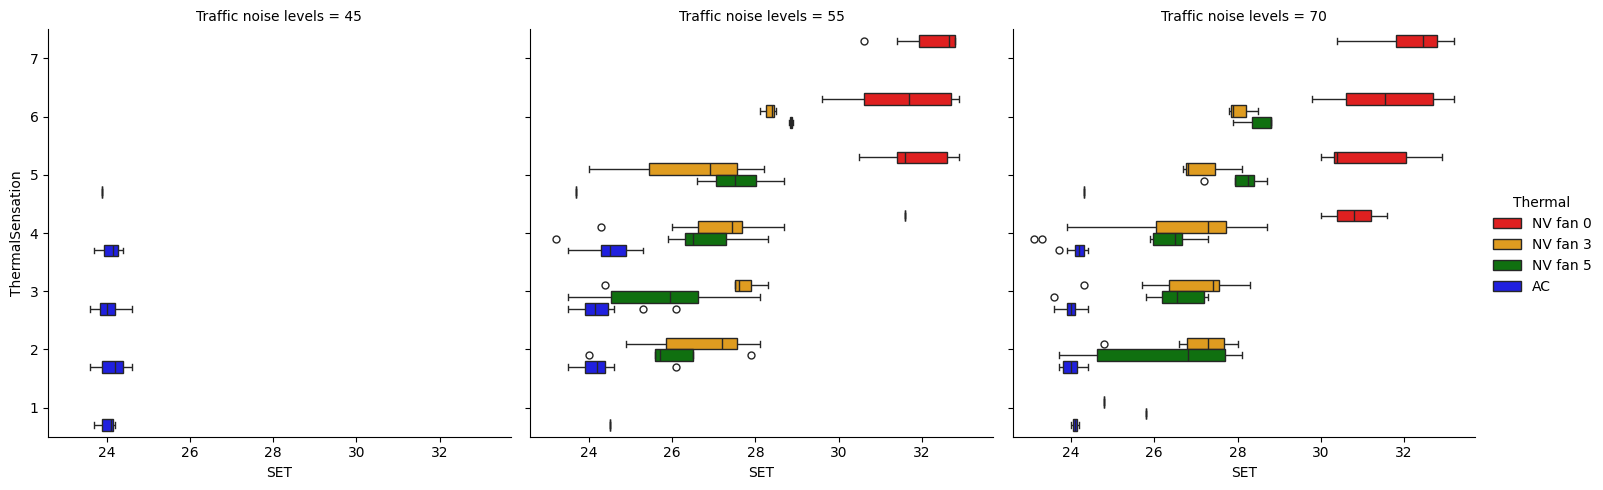

In [27]:
sns.catplot(
    data=data_final_plot3, 
    x='SET', 
    y='ThermalSensation',
    hue='Thermal',
    col='Traffic noise levels', kind='box', col_wrap=3,
    palette=sns.color_palette(['red','orange','green','blue']),
)

## Plot 3B

In [28]:
sb_y = ["Rotation_max", "SpatialSpan_max", "DoubleTrouble_max", "FeatureMatch_max"]
data_final_plot3b = data_master[['Traffic noise levels', 'SET', 'Thermal']+sb_y]
data_final_plot3b['Thermal'] = pd.Categorical(data_final_plot3b['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot3b.sort_values('Thermal', inplace=True)
data_final_plot3b.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3841677750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3b['Thermal'] = pd.Categorical(data_final_plot3b['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3841677750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3b.sort_values('Thermal', inplace=True)


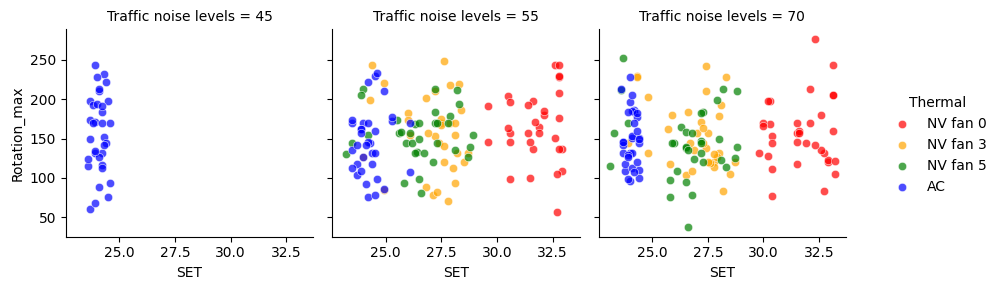

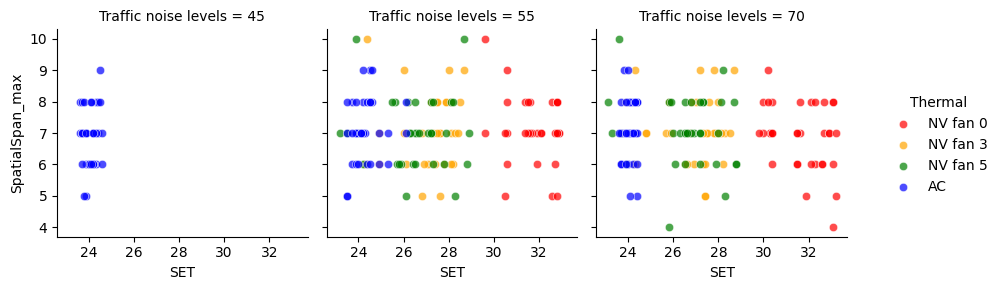

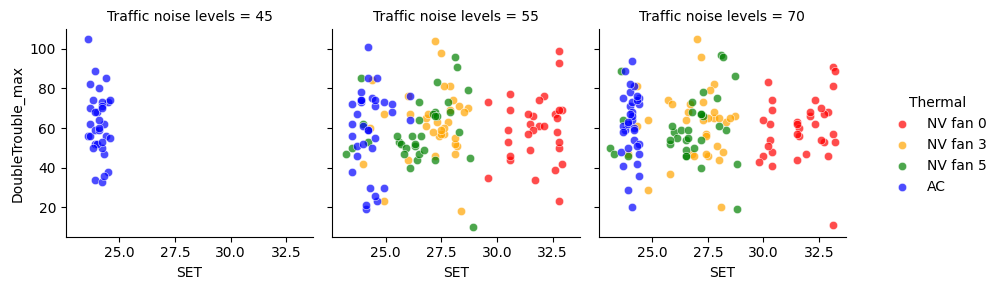

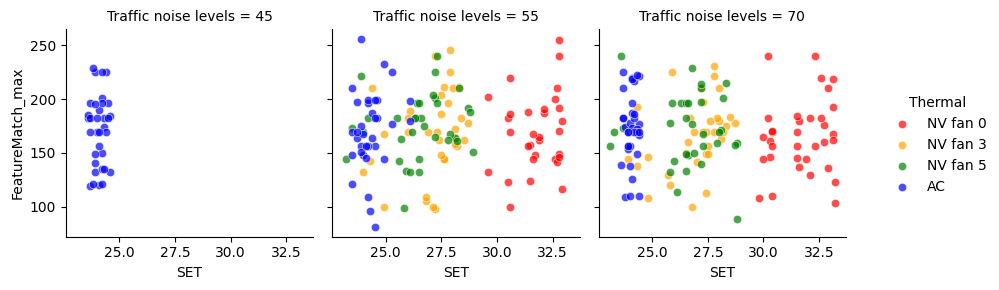

In [29]:
for item in sb_y:
    ordered_col = data_final_plot3b['Traffic noise levels'].value_counts().index.sort_values()
    g = sns.FacetGrid(data_final_plot3b, col="Traffic noise levels", hue="Thermal", margin_titles=True, col_order=ordered_col, palette=sns.color_palette(['red','orange','green','blue']))
    g.map(sns.scatterplot, "SET", item, alpha=.7)
    g.add_legend()

## Plot 4b

In [30]:
sb_y = ["Rotation_max", "SpatialSpan_max", "DoubleTrouble_max", "FeatureMatch_max","SET"]
data_final_plot4b = data_master[['Traffic noise levels', 'Thermal']+sb_y]
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_final_plot4b.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_final_plot4b.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\451263487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot4b.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)


C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

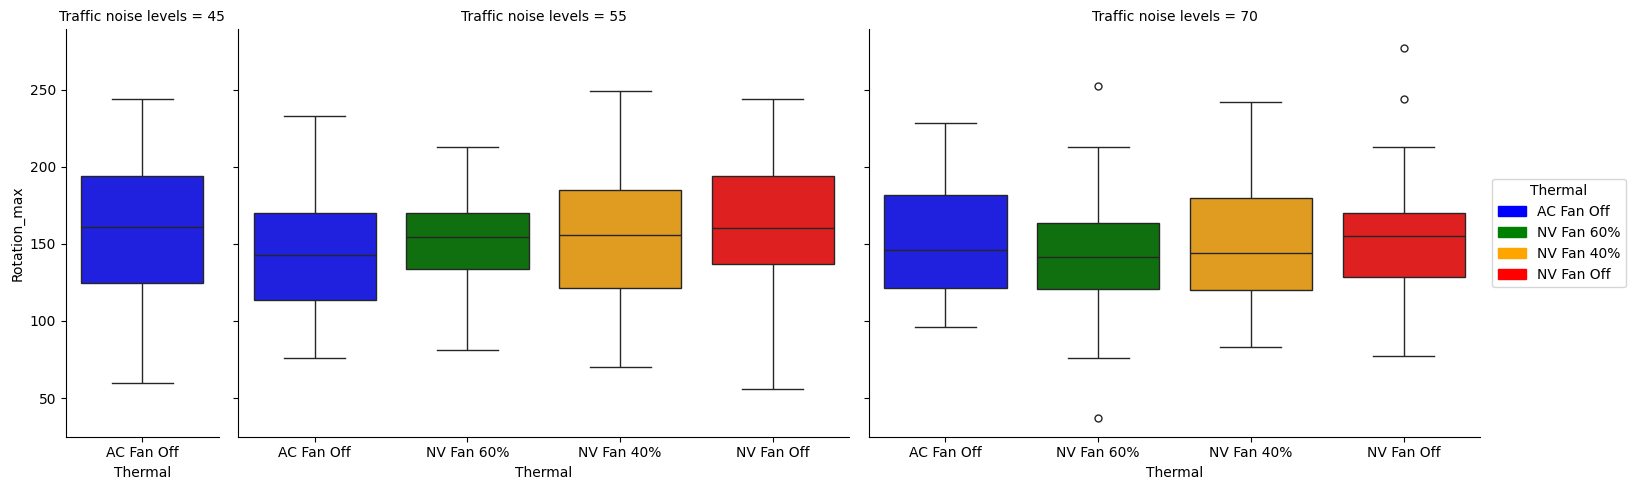

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

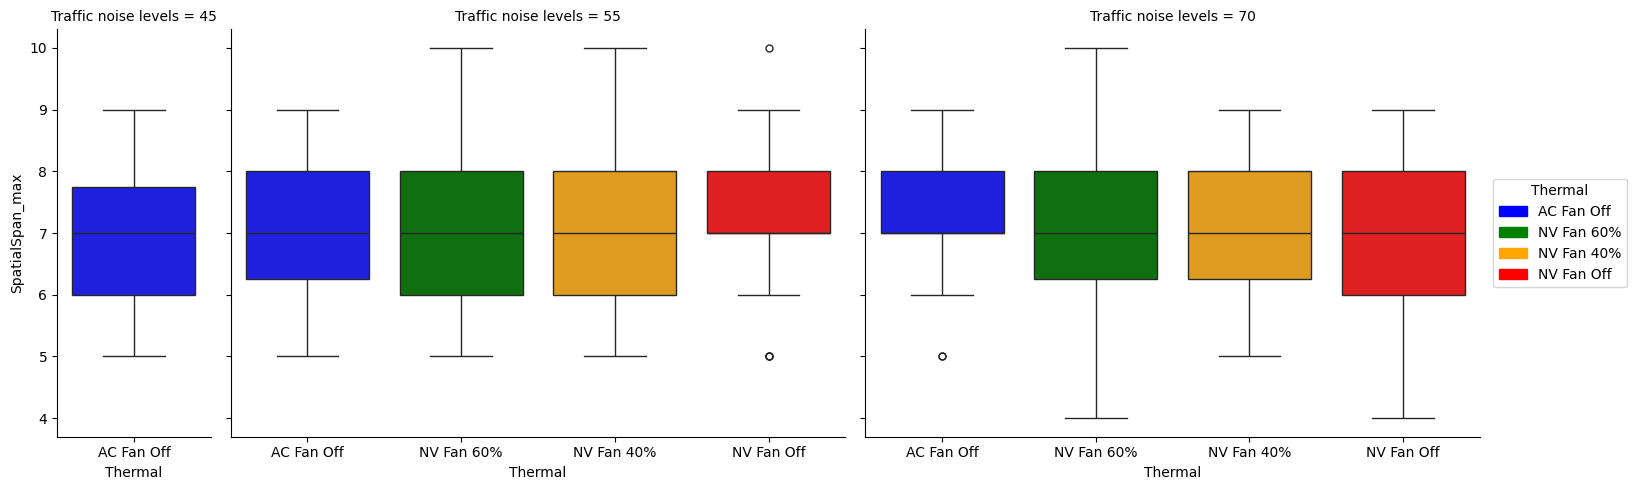

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

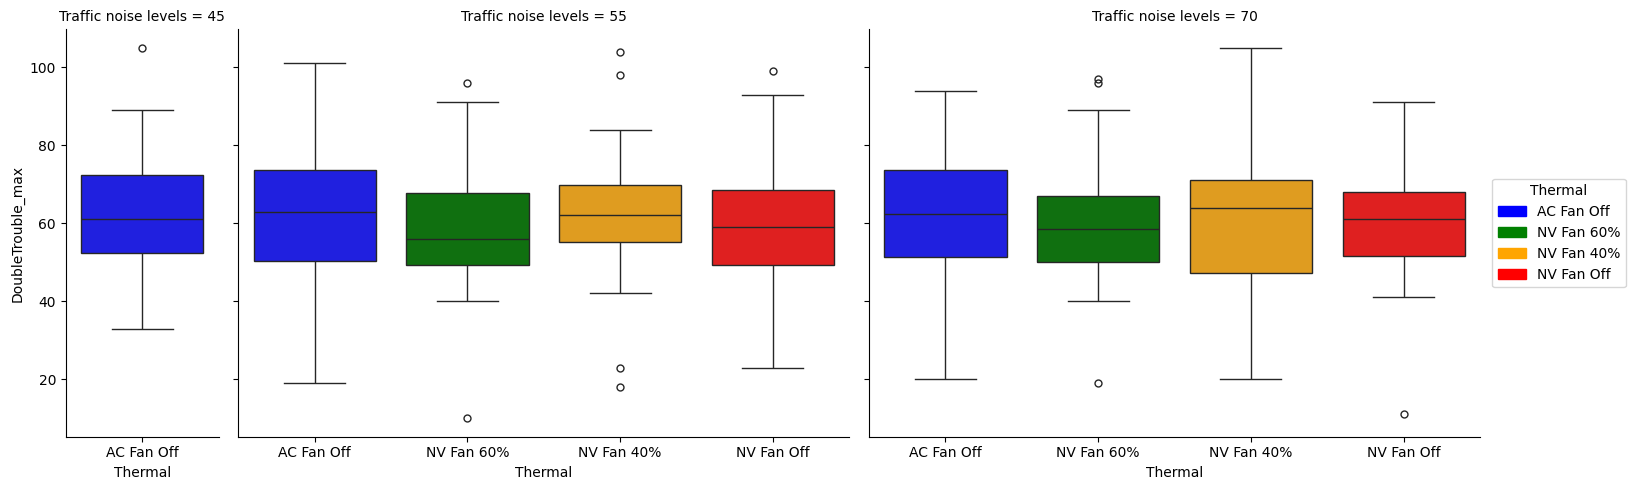

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

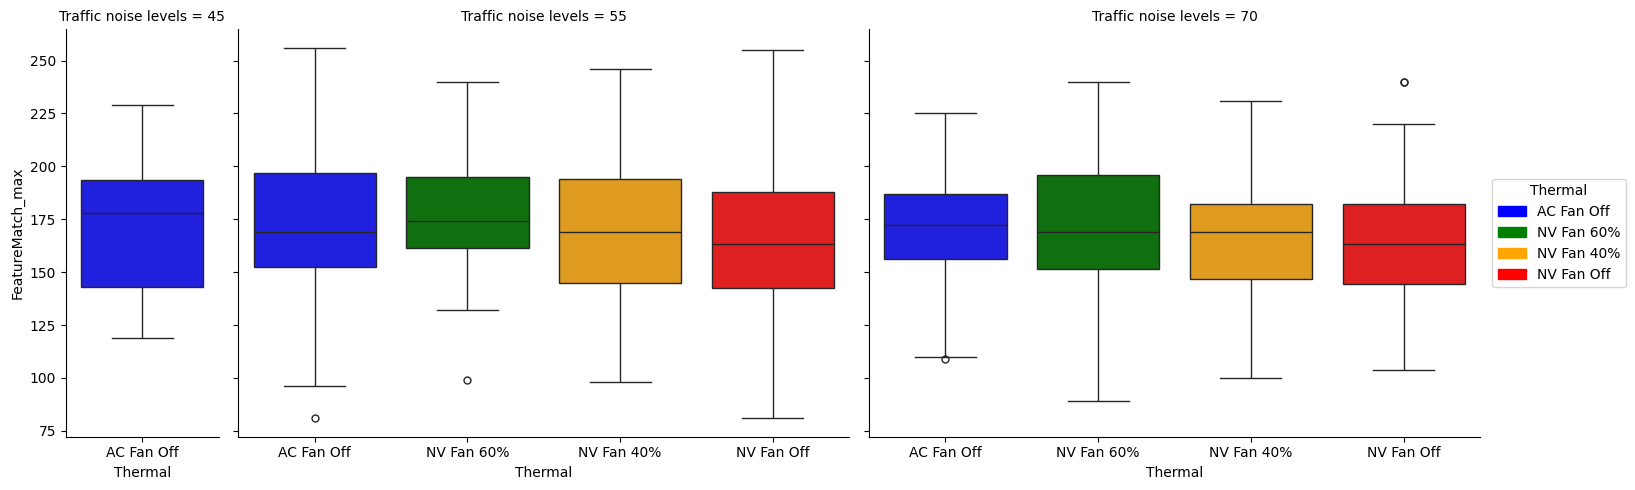

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3348150943.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

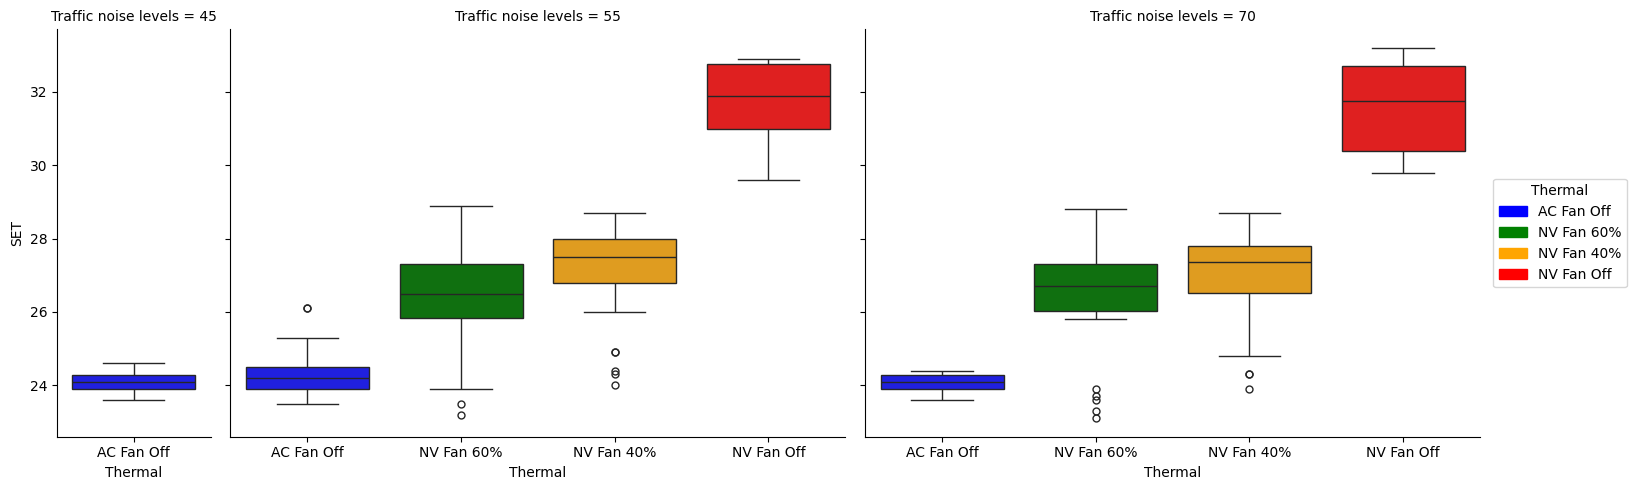

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
red_patch = mpatches.Patch(color='red', label="NV Fan Off")

for item in sb_y:
    g = sns.catplot(
        data=data_final_plot4b, 
        x='Thermal', 
        y=item,
        col='Traffic noise levels', kind='box',
        palette=sns.color_palette(['blue','green','orange','red']),
        facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
        sharex=False,
        legend=False
    )
    for id, ax in enumerate(g.axes_dict.items()):
    #     print(id)
        if id == 0:
            ax[1].set_xticklabels(["AC Fan Off"])
        else:
            ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
    
    plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
    plt.show(g)

## Plot 5

In [32]:
sb_y = ["Rotation_max", "SpatialSpan_max", "DoubleTrouble_max", "FeatureMatch_max"]
data_final_plot5 = data_master[['Experiment set', 'Experiment id', 'Thermal', 'Traffic noise levels']+sb_y]
data_final_plot5.head()
data_final_plot5['Thermal'] = pd.Categorical(data_final_plot5['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot5.sort_values('Thermal', inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\130532557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot5['Thermal'] = pd.Categorical(data_final_plot5['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\130532557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot5.sort_values('Thermal', inplace=True)


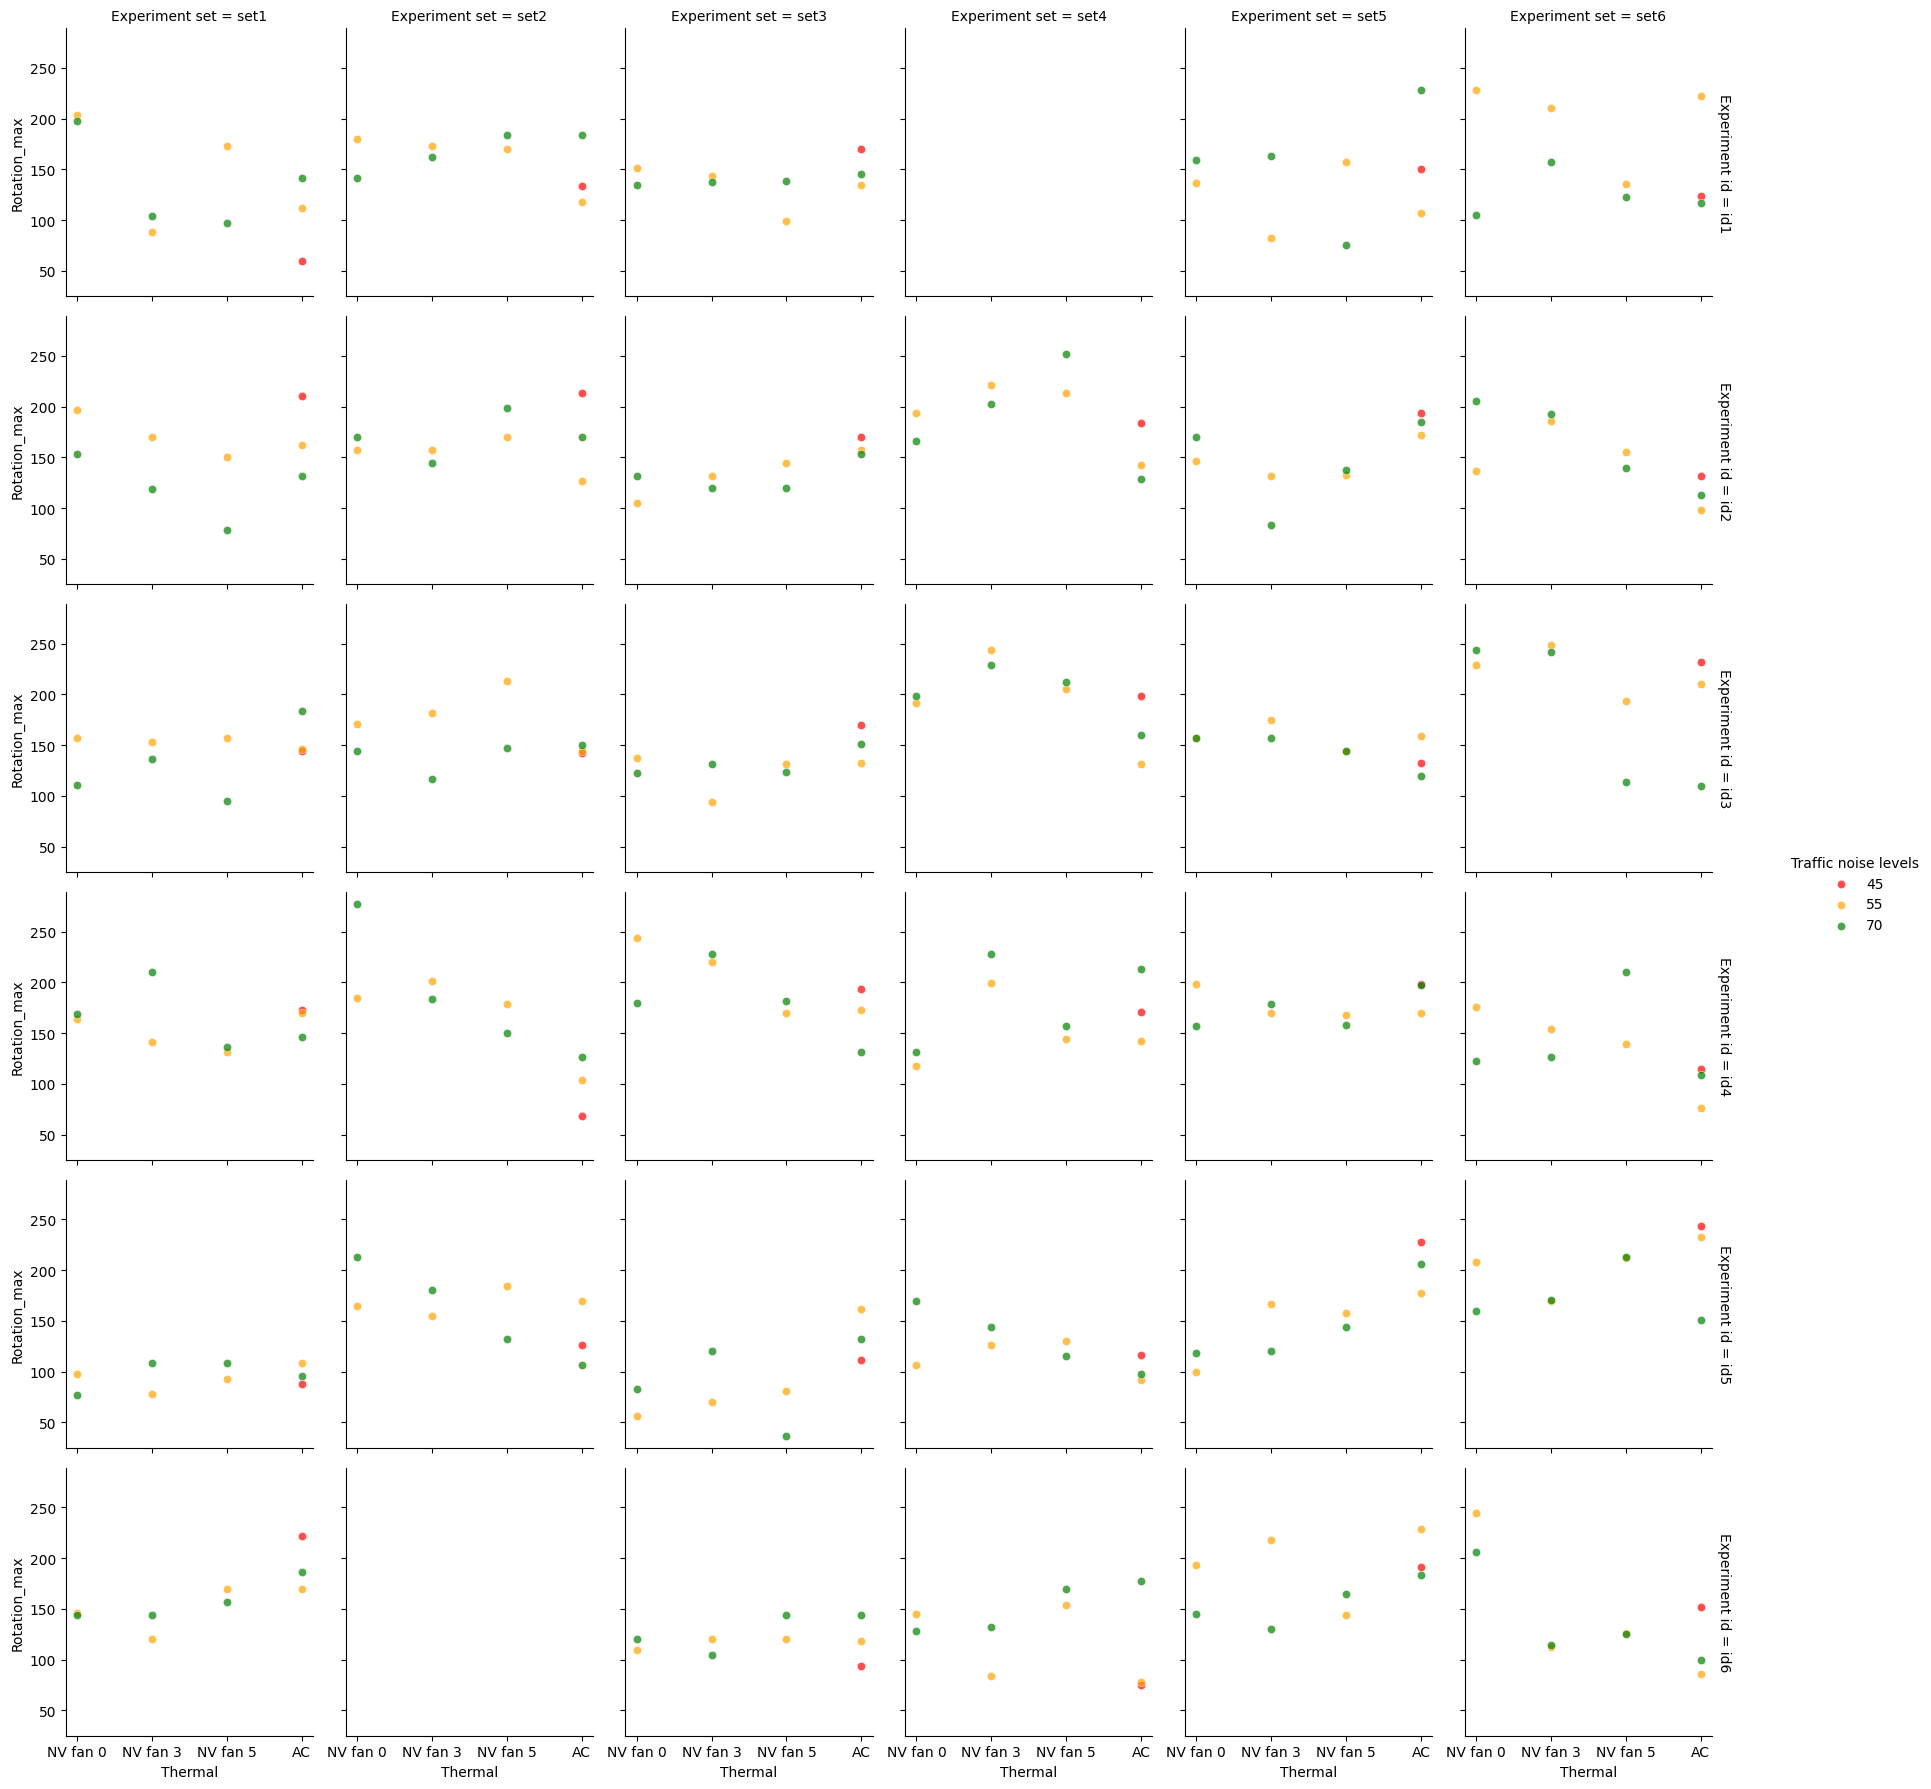

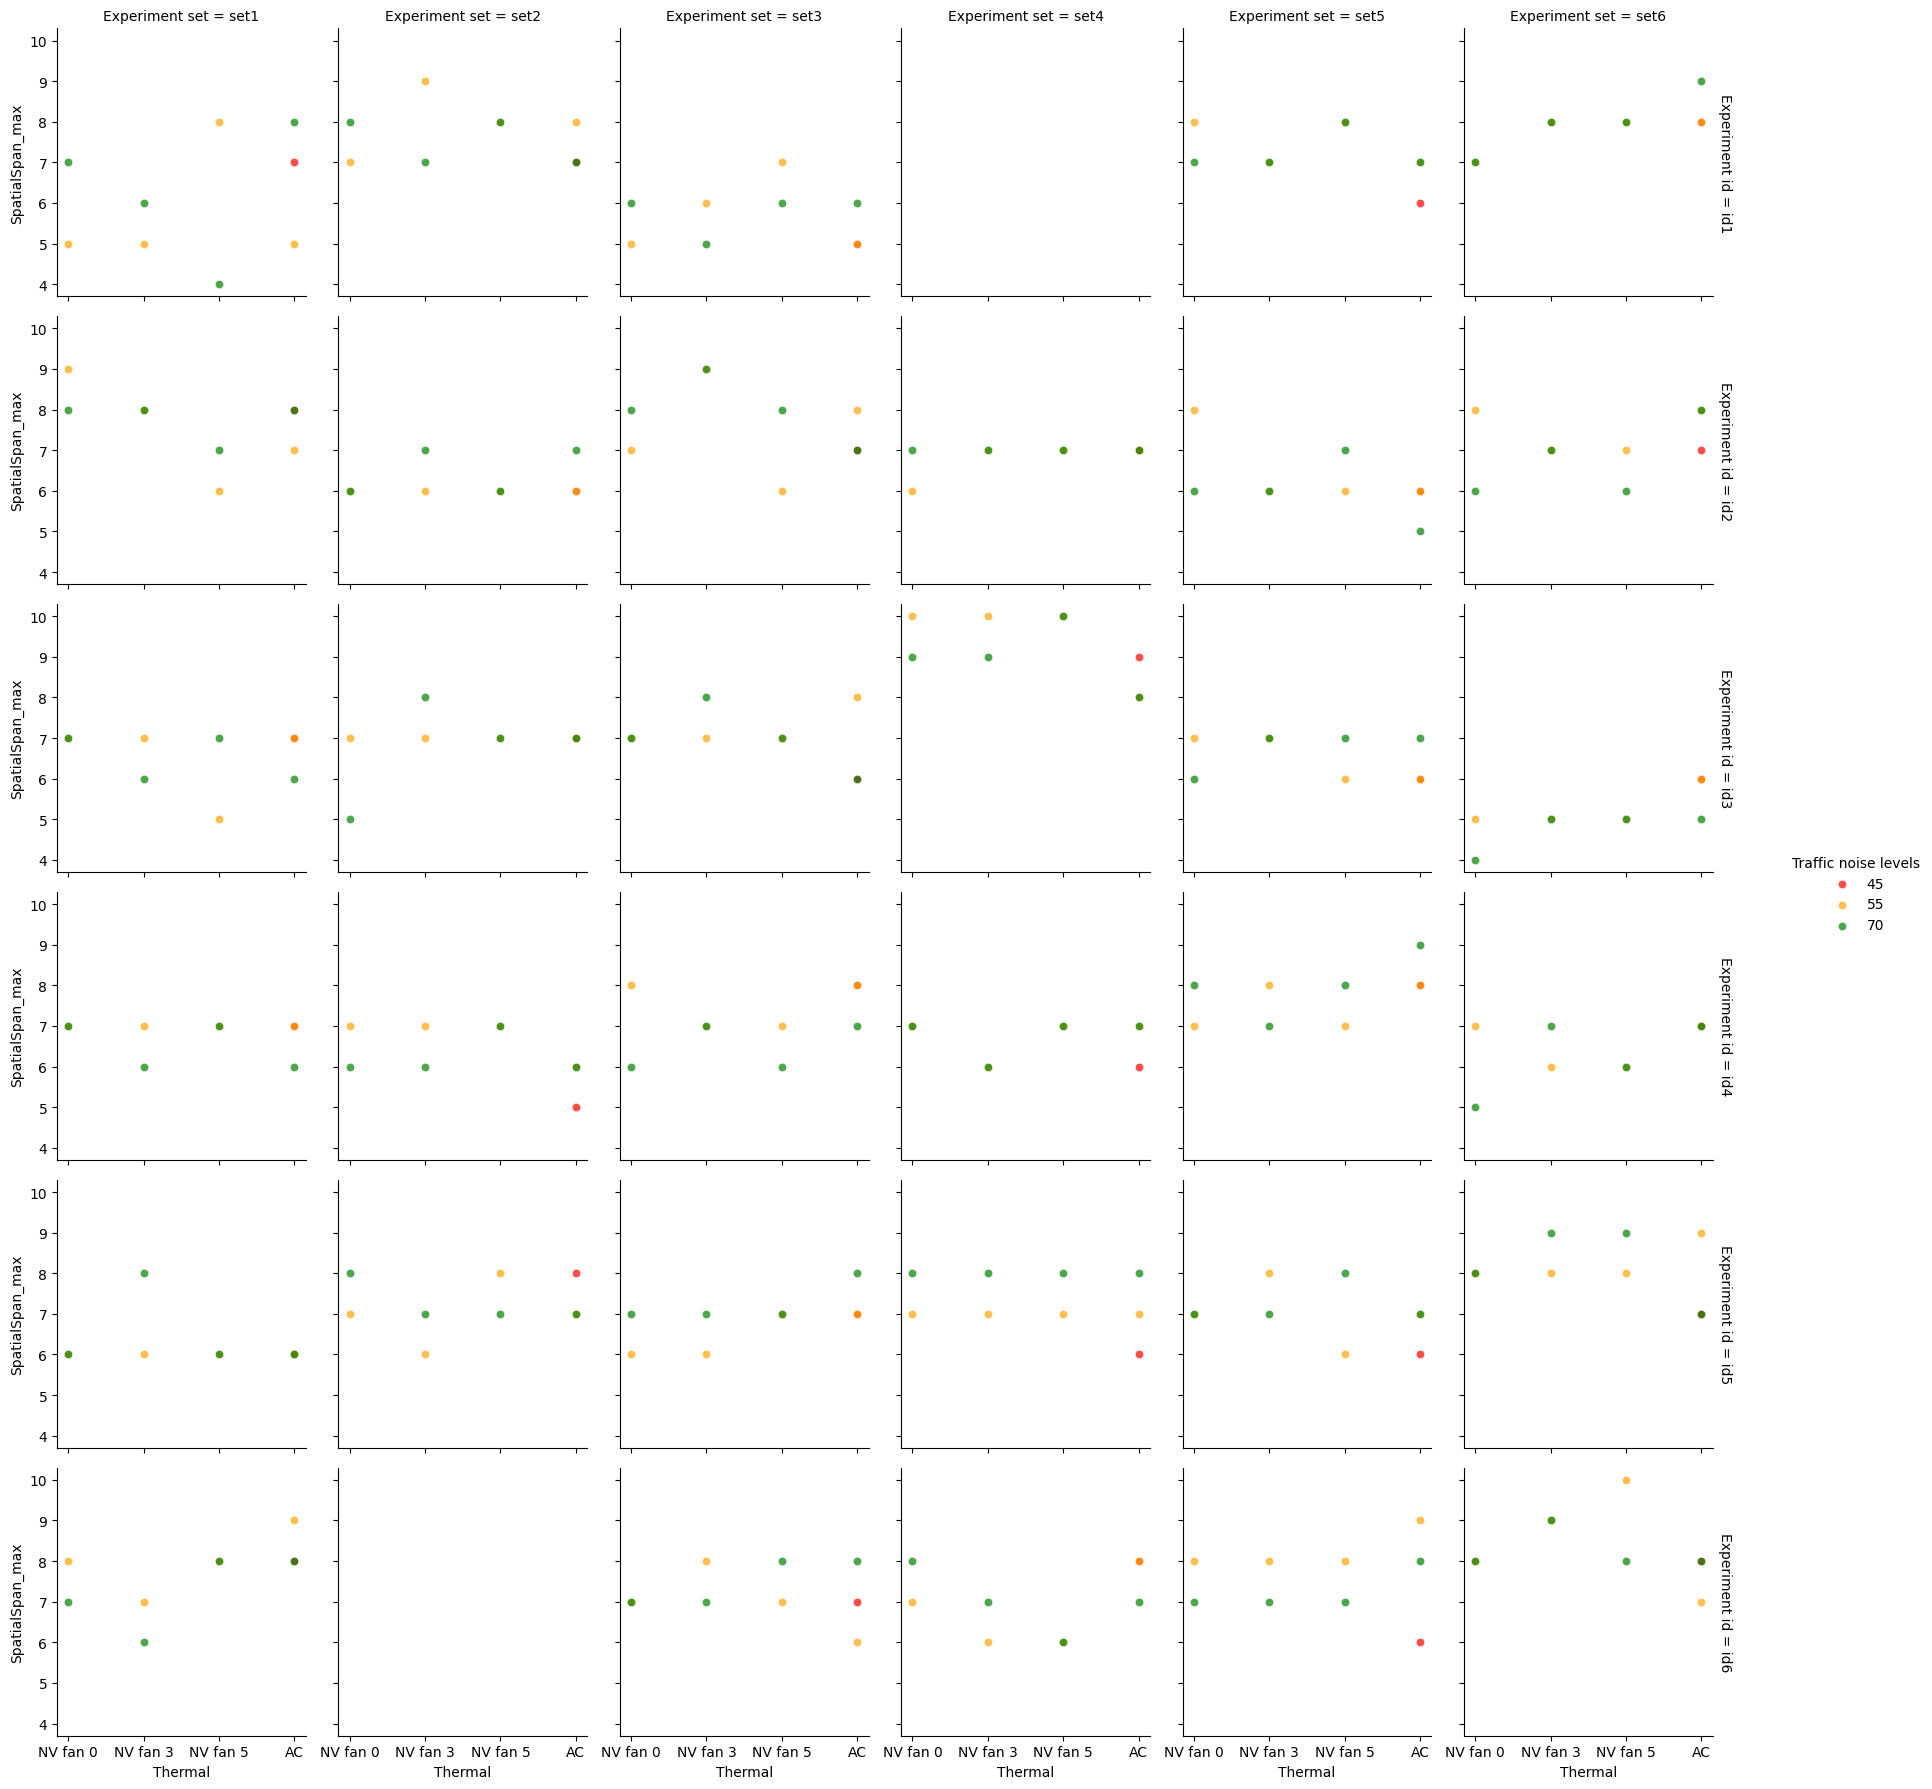

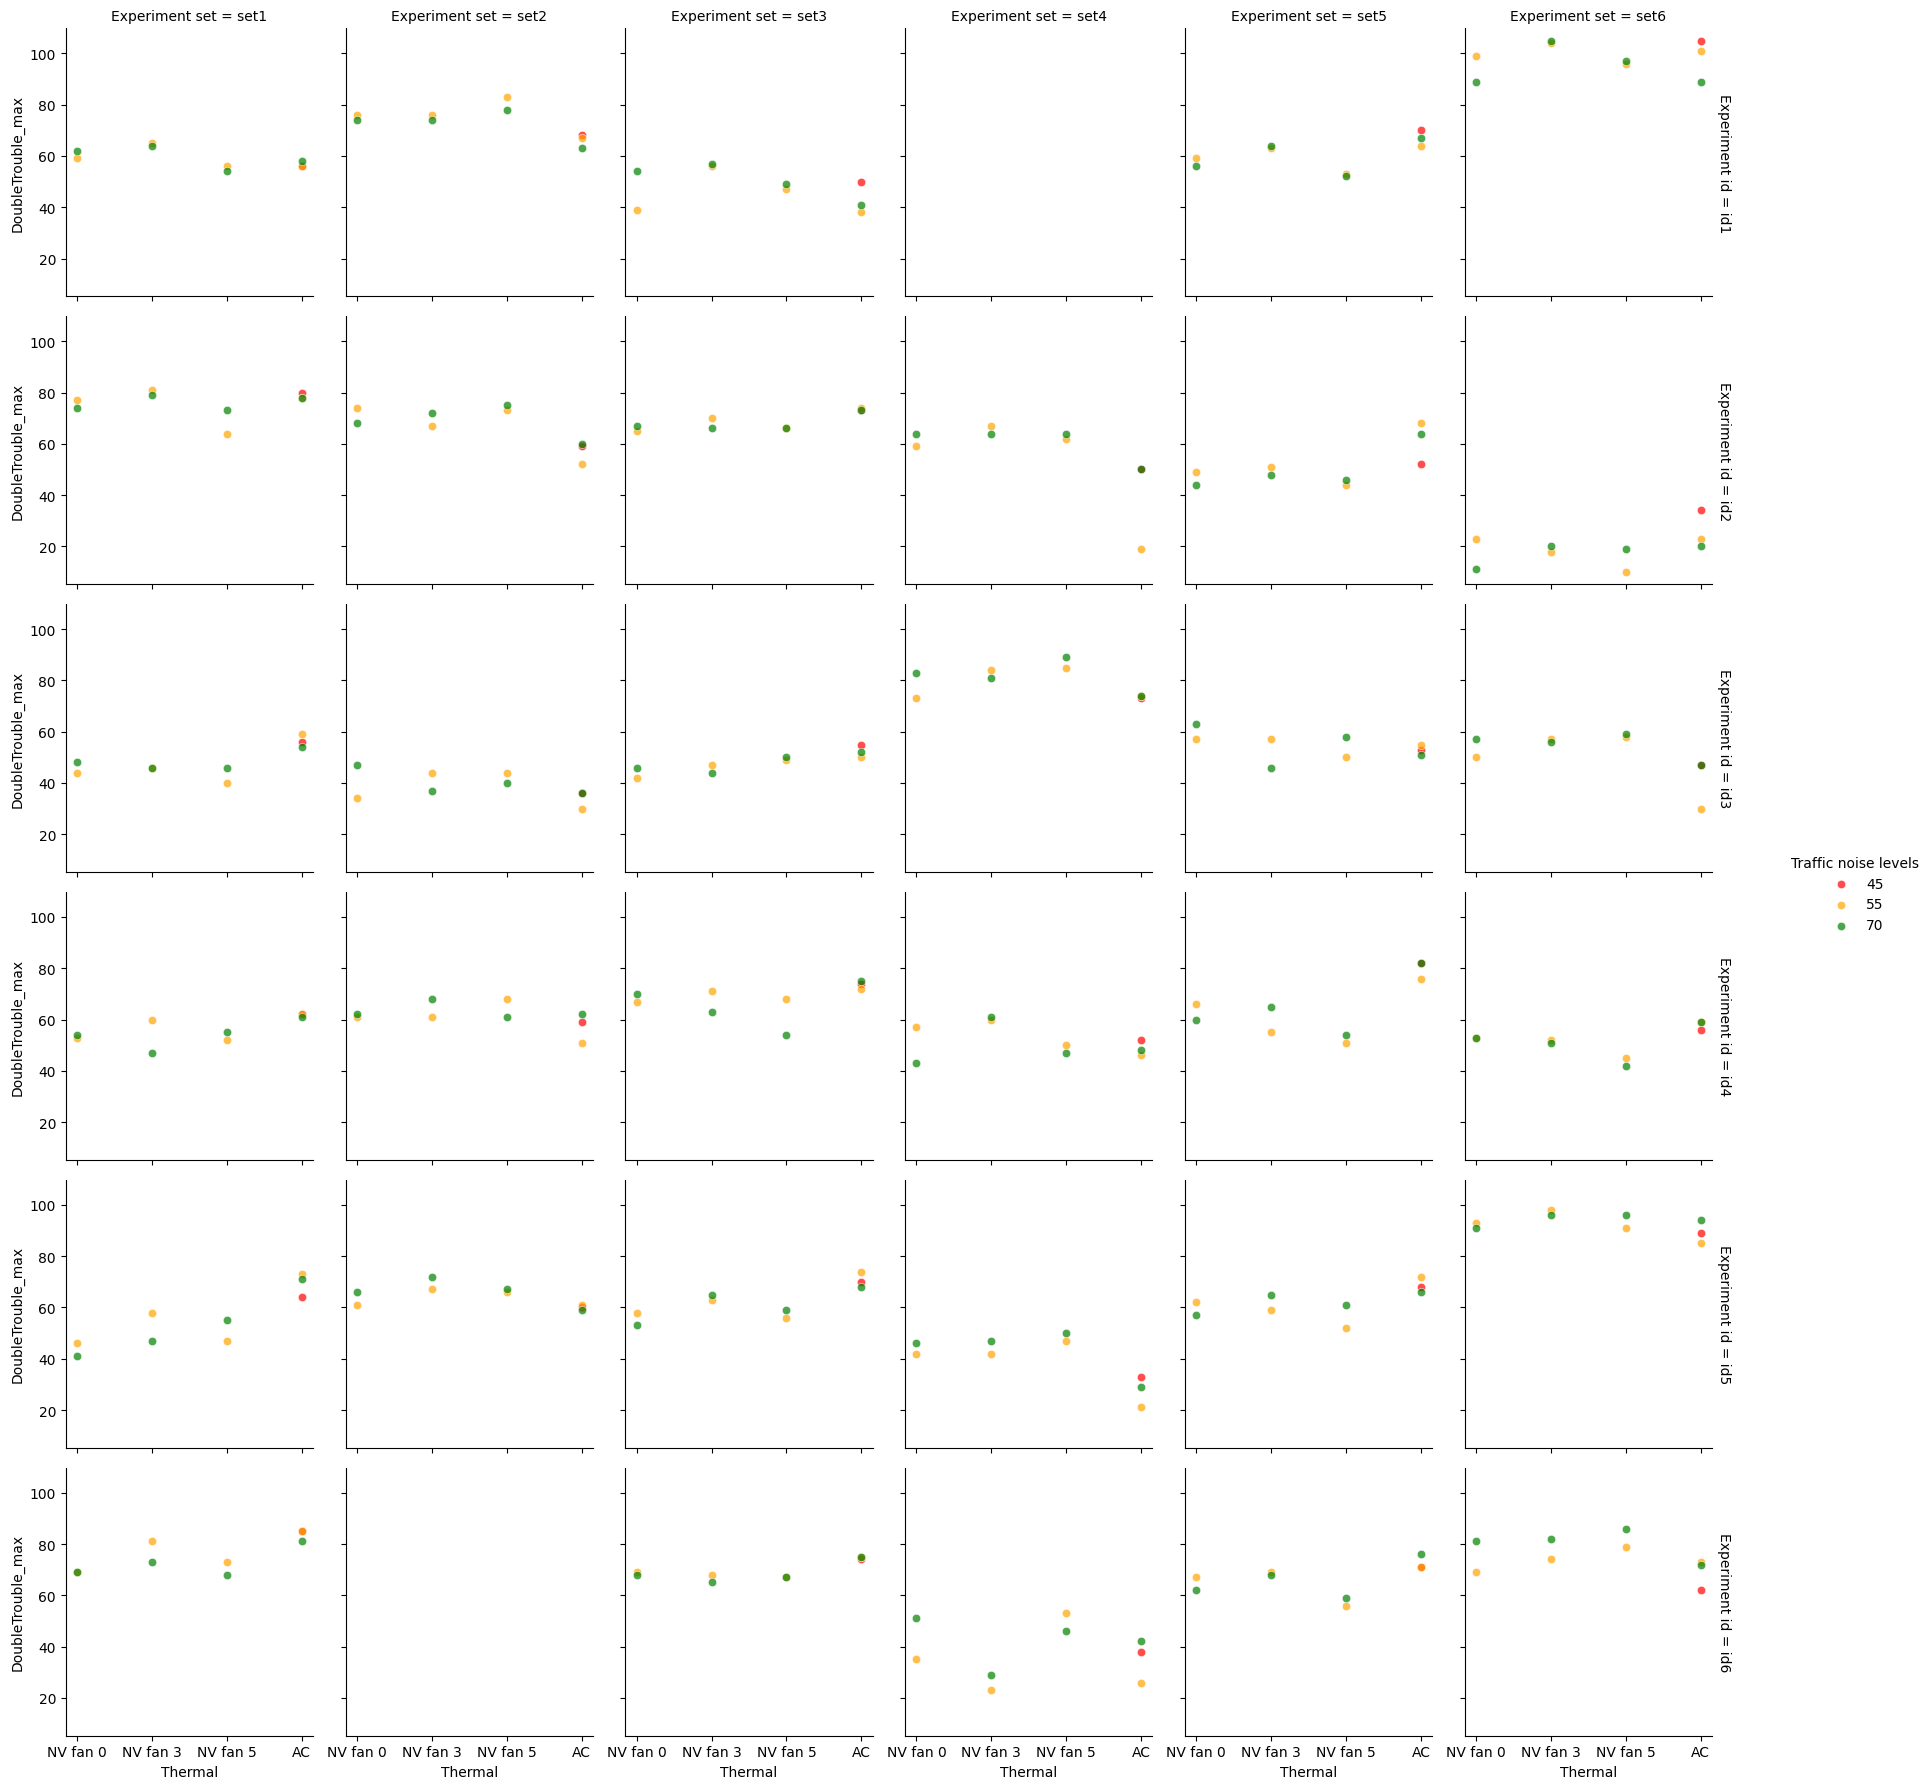

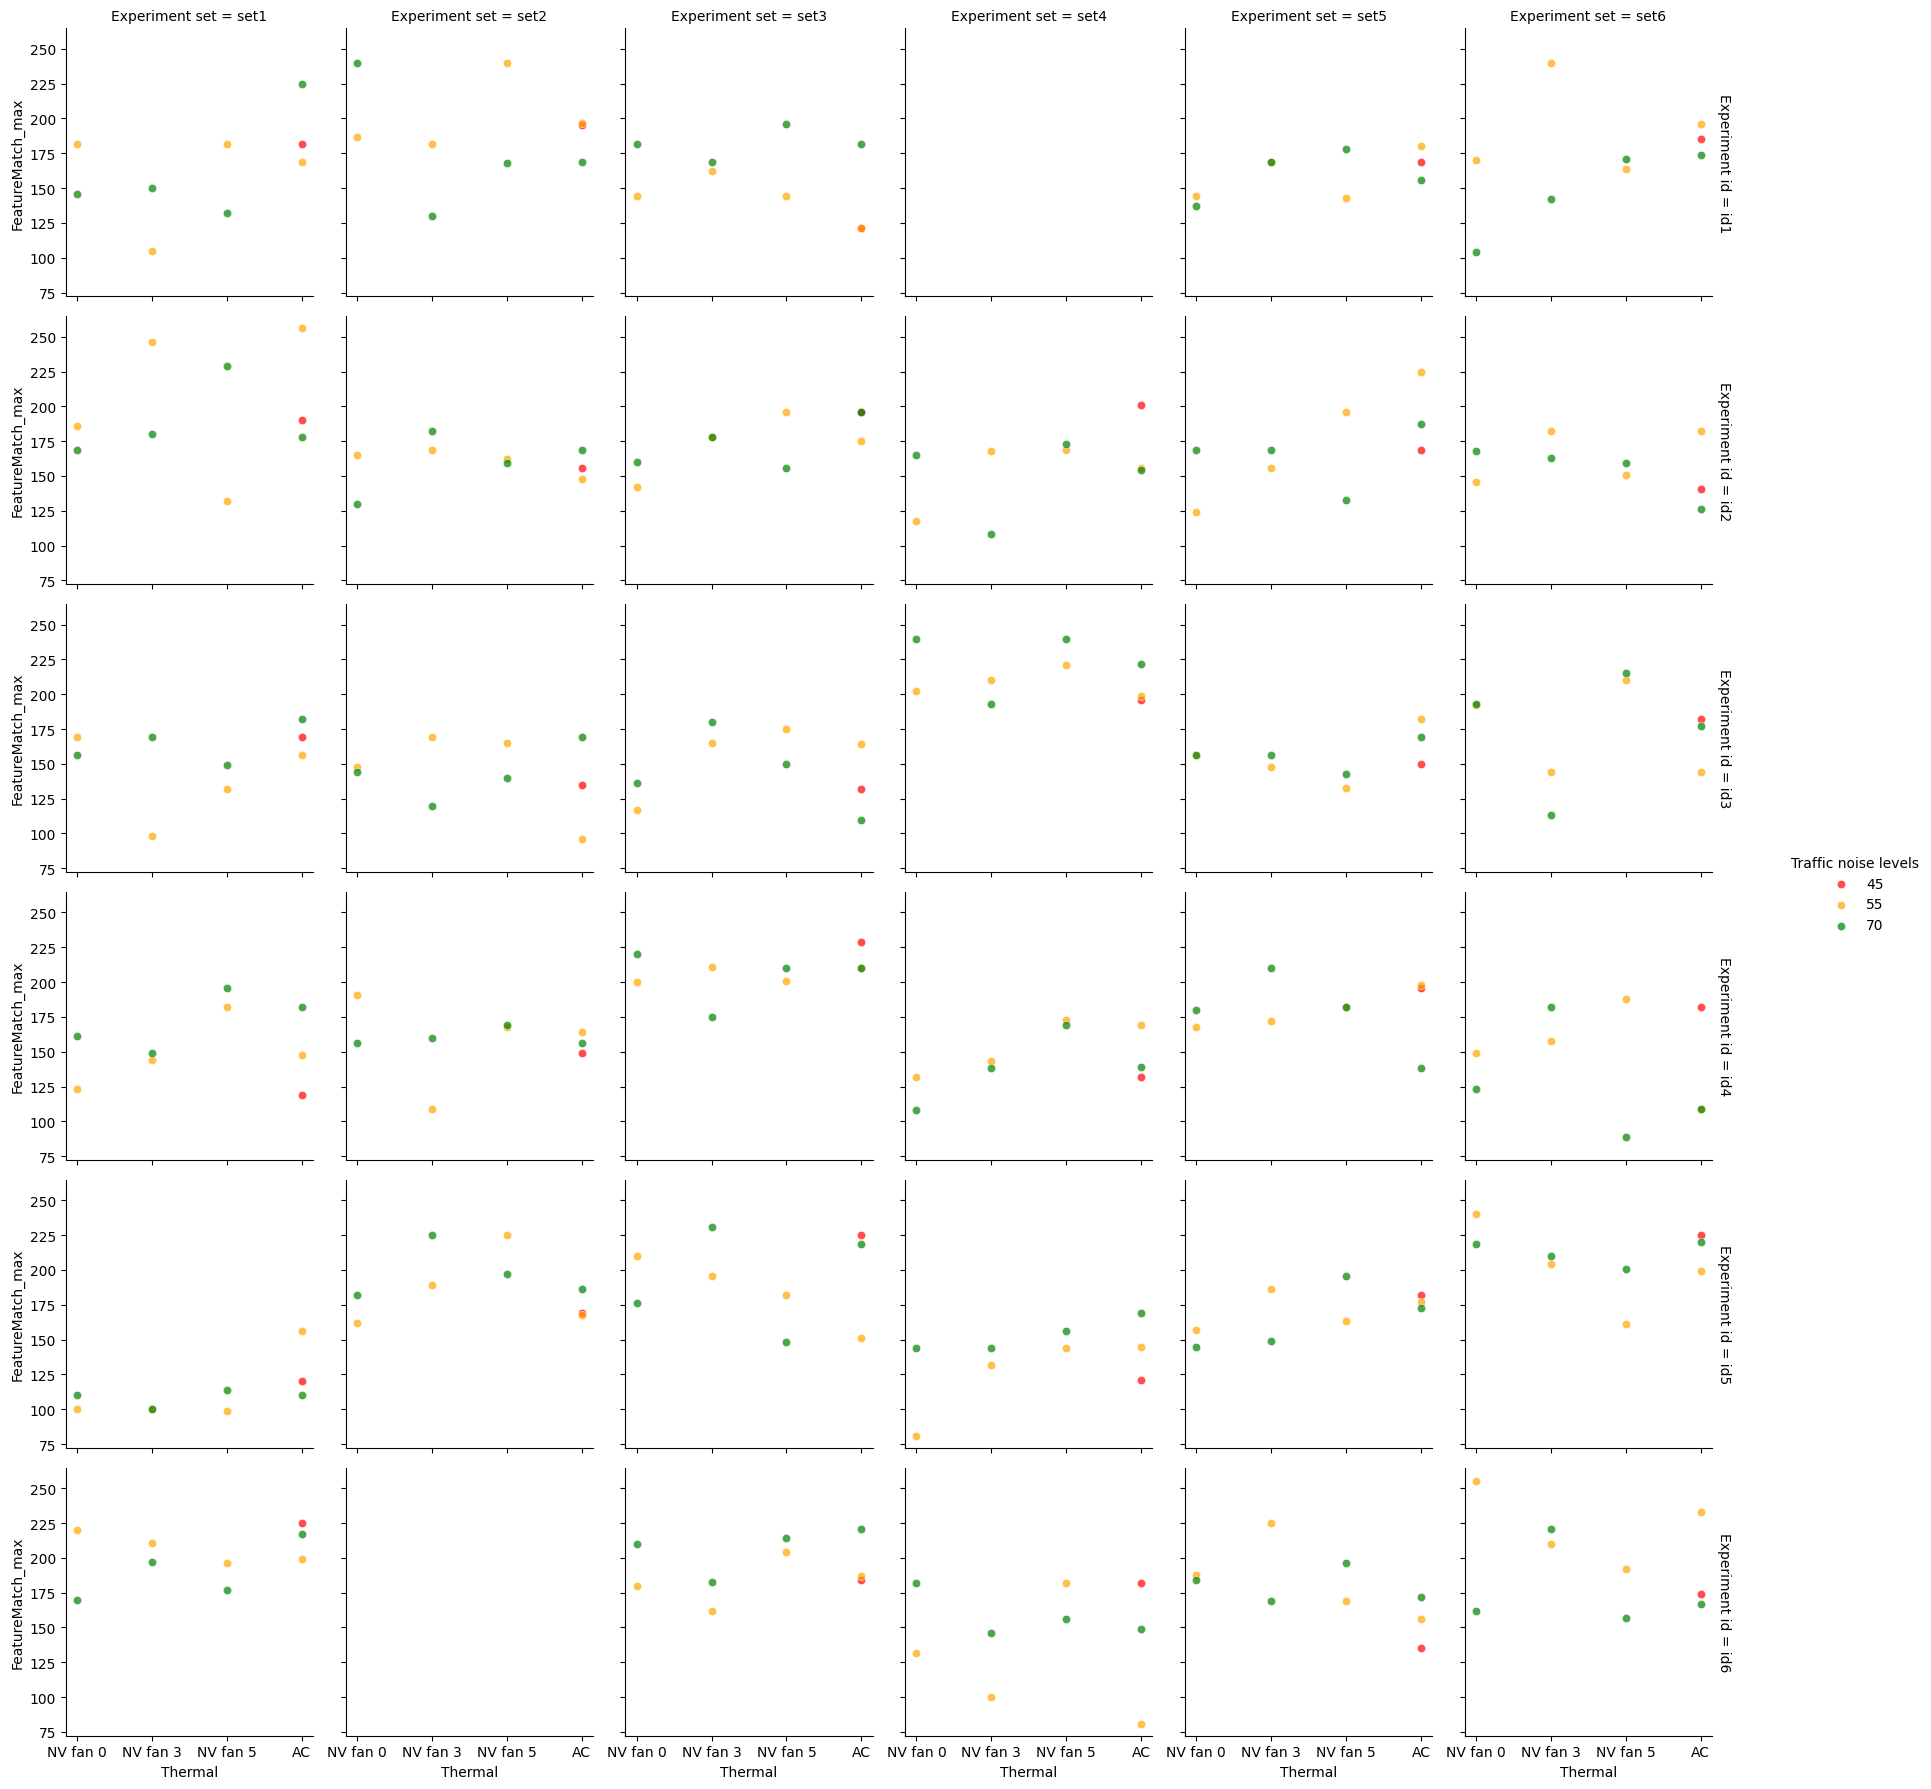

In [14]:
ordered_row = data_final_plot5['Experiment id'].value_counts().index.sort_values()
ordered_col = data_final_plot5['Experiment set'].value_counts().index.sort_values()
for item in sb_y:
    g = sns.FacetGrid(data_final_plot5, col="Experiment set", row="Experiment id", hue="Traffic noise levels", margin_titles=True, row_order=ordered_row, col_order=ordered_col, palette=sns.color_palette(['red','orange','green','blue']),)
    g.map(sns.scatterplot, "Thermal", item, alpha=.7)
    g.add_legend()

# HR Plot

In [34]:
# from datetime import datetime
# # loading data master
# set_ = [1,2,3,4,5,6]
# id_ = [1,2,3,4,5,6]

# data_HR = pd.DataFrame(columns=['Time','HR','RR','MS','SKINCONTACT','experiment_set','experiment_id','subid','Thermal','Traffic noise levels','Speech'])
# data_V4 = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
# for set in set_ :
#     for id in id_:
#         data = pd.read_excel(f"../8_resampleHR/HR_set{set}.xlsx", sheet_name=f'id{id}')
#         data_fromV4 = data_V4[(data_V4['Experiment set']==f"set{set}") & (data_V4['Experiment id']==f"id{id}")]
#         if data_fromV4.empty:
#                 continue
#         list_of_date = []
#         current_date = 0
#         current_data = ""
#         status = True
#         counter = 0
#         for ind, row in data_fromV4.iterrows():
#             date = str(row["End Date"].date())
#             start_clock, end_clock = row['Time_thermal'].split("-")
#             start_time = date+" "+start_clock
#             start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M")
            
#             if status:
#                 list_of_date.append(start_time)
#                 status = False
#                 current_date = datetime.strptime(date, "%Y-%m-%d").day

#             if datetime.strptime(date, "%Y-%m-%d").day > current_date and not status:
#                 list_of_date.append(current_data)
#                 list_of_date.append(start_time)
#                 current_date = datetime.strptime(date, "%Y-%m-%d").day

#             end_time = date+" "+end_clock
#             end_time = datetime.strptime(end_time, "%Y-%m-%d %H:%M")
#             current_data = end_time

#             if counter == len(list(data_fromV4.iterrows()))-1:
#                 list_of_date.append(end_time)
            
#             counter+=1
#         data = data[((data['Time']>=list_of_date[0]) & (data['Time']<=list_of_date[1])) | ((data['Time']>=list_of_date[2]) & (data['Time']<=list_of_date[3]))]
#         frames = [data_HR, data]
#         data_HR = pd.concat(frames)
# data_HR.to_excel("HR_compilation.xlsx", index=False)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\2524570577.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_HR = pd.concat(frames)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\2524570577.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_HR = pd.concat(frames)


In [37]:
data_HR = pd.read_excel("HR_compilation.xlsx")
data_HR.dropna(subset=['Thermal', 'Traffic noise levels'], inplace=True)
data_HR = data_HR[data_HR['Speech']==0]
data_HR = data_HR[data_HR['HR']>0]
data_HR = data_HR[~((data_HR['Traffic noise levels']==45) & (data_HR['HR']>130))]

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\718658817.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\718658817.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\718658817.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\718658817.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan 

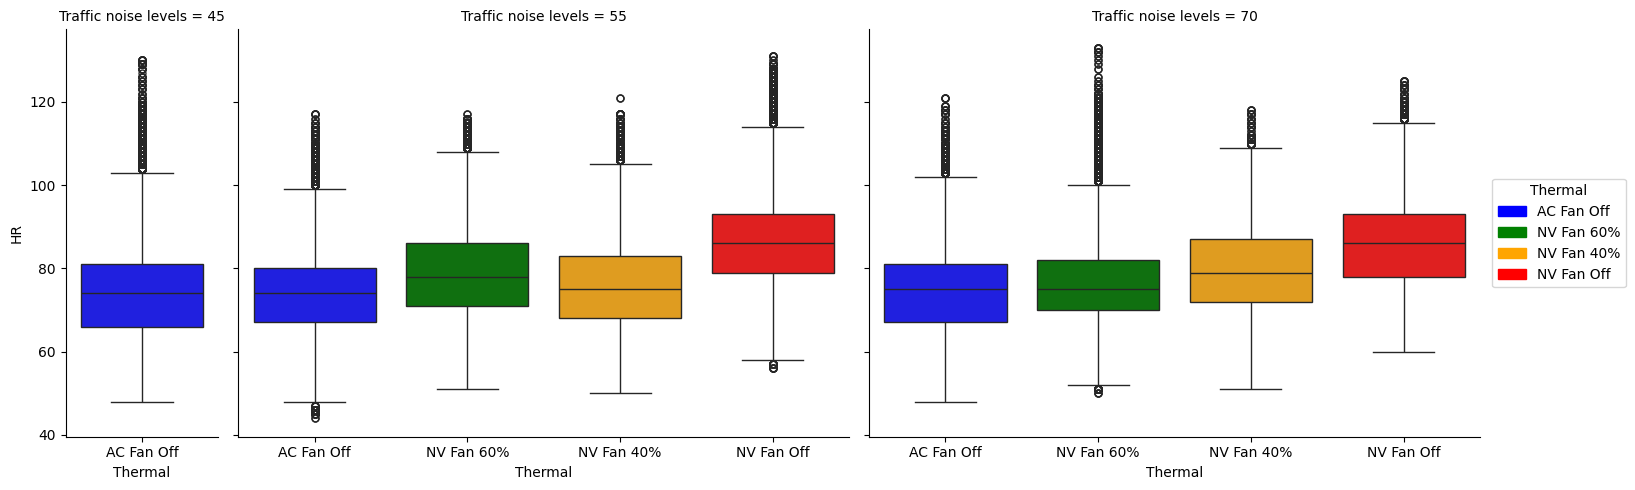

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_HR['Thermal'] = pd.Categorical(data_HR['Thermal'],["AC", "NV fan 5", "NV fan 3", "NV fan 0"])
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_HR.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_HR.reset_index(inplace=True)
g = sns.catplot(
    data=data_HR, 
    x='Thermal', 
    y="HR",
    col='Traffic noise levels', kind='box',
    palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False
)
for id, ax in enumerate(g.axes_dict.items()):
    #     print(id)
        if id == 0:
            ax[1].set_xticklabels(["AC Fan Off"])
        else:
            ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
    
plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.show(g)

# SkinT Plot

In [40]:
# loading data master
from datetime import datetime

set_ = [1,2,3,4,5,6]
id_ = [1,2,3,4,5,6]

date = {
    1:[10,11],
    2:[12,13],
    3:[17,18],
    4:[19,20],
    5:[24,25],
    6:[26,27]
}

data_SkinT = pd.DataFrame(columns=['Time','Unit','1','2','3','4','Tmsk','experiment_set','experiment_id','subid','Thermal','Traffic noise levels','Speech'])
data_V4 = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
try:
    for set in set_ :
        for id in id_:
            data = pd.read_excel(f"../7_resampleIntoEachSet/SkinT_set{set}_adjustment.xlsx", sheet_name=f'idid{id}')
            data_fromV4 = data_V4[(data_V4['Experiment set']==f"set{set}") & (data_V4['Experiment id']==f"id{id}")]
            if data_fromV4.empty:
                continue
            list_of_date = []
            current_date = 0
            current_data = ""
            status = True
            counter = 0
            for ind, row in data_fromV4.iterrows():
                date = str(row["End Date"].date())
                start_clock, end_clock = row['Time_thermal'].split("-")
                start_time = date+" "+start_clock
                start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M")
                
                if status:
                    list_of_date.append(start_time)
                    status = False
                    current_date = datetime.strptime(date, "%Y-%m-%d").day

                if datetime.strptime(date, "%Y-%m-%d").day > current_date and not status:
                    list_of_date.append(current_data)
                    list_of_date.append(start_time)
                    current_date = datetime.strptime(date, "%Y-%m-%d").day

                end_time = date+" "+end_clock
                end_time = datetime.strptime(end_time, "%Y-%m-%d %H:%M")
                current_data = end_time

                if counter == len(list(data_fromV4.iterrows()))-1:
                    list_of_date.append(end_time)
                
                counter+=1
            data = data[((data['Time']>=list_of_date[0]) & (data['Time']<=list_of_date[1])) | ((data['Time']>=list_of_date[2]) & (data['Time']<=list_of_date[3]))]
            frames = [data_SkinT, data]
            data_SkinT = pd.concat(frames)
except ValueError as e:
    print(e)
    print(set, id)
except IndexError as e:
    print(e)
    print(set, id)
data_SkinT.dropna(subset=['Thermal', 'Traffic noise levels'], inplace=True)
data_SkinT = data_SkinT[data_SkinT['Speech']==0]
data_SkinT.to_excel("SkinT_compilation.xlsx", index=False)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\185751433.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_SkinT = pd.concat(frames)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\185751433.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_SkinT = pd.concat(frames)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\185751433.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude emp

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1306992493.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1306992493.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1306992493.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1306992493.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

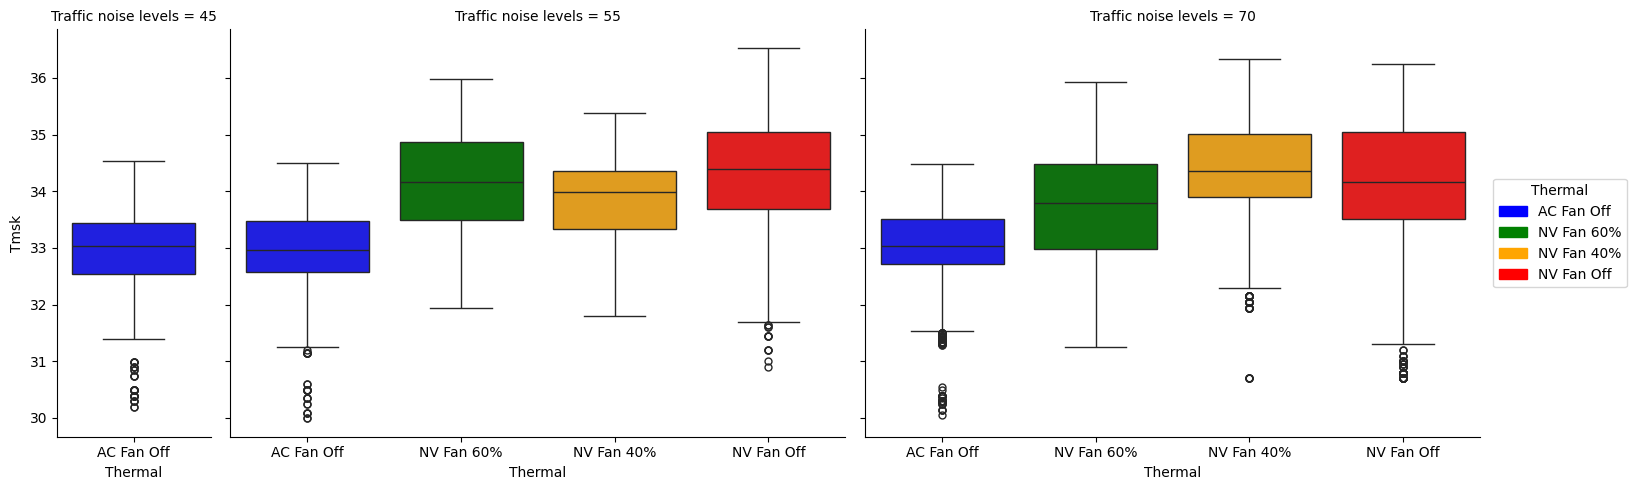

In [41]:
data_SkinT = pd.read_excel("SkinT_compilation.xlsx")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_SkinT['Thermal'] = pd.Categorical(data_SkinT['Thermal'],["AC", "NV fan 5", "NV fan 3", "NV fan 0"])
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_SkinT.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_SkinT.reset_index(inplace=True)
g = sns.catplot(
    data=data_SkinT, 
    x='Thermal', 
    y="Tmsk",
    col='Traffic noise levels', kind='box',
    palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False
)
for id, ax in enumerate(g.axes_dict.items()):
    #     print(id)
        if id == 0:
            ax[1].set_xticklabels(["AC Fan Off"])
        else:
            ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
    
plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.show(g)

# Plot From V5

In [42]:
import pandas as pd
data_v5 = pd.read_excel("../0_dataset_master/Experiment_edited_V5b.xlsx")
data_v5.dropna(subset=['Average_tmsk', 'Average_HR','Thermal', 'Traffic noise levels'], inplace=True)
custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_v5.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1235223157.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1235223157.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1235223157.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\1235223157.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

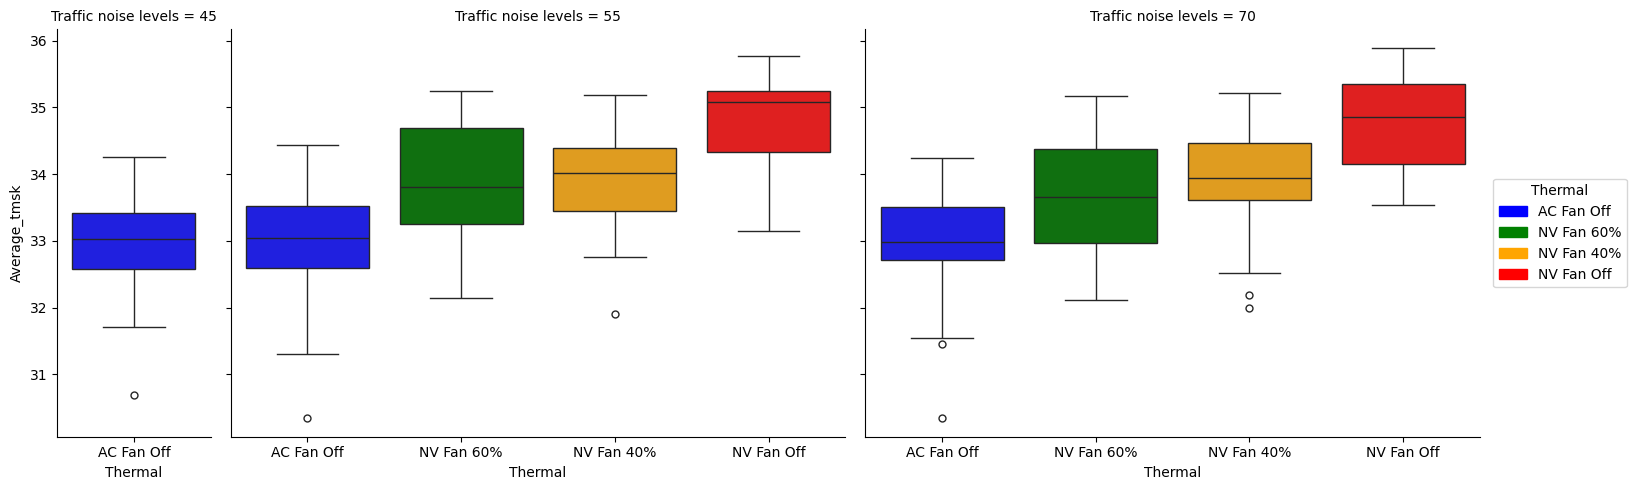

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
red_patch = mpatches.Patch(color='red', label="NV Fan Off")

# data_v5.reset_index(inplace=True)
g = sns.catplot(
    data=data_v5, 
    x='Thermal', 
    y="Average_tmsk",
    col='Traffic noise levels', kind='box',
    palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False
)
for id, ax in enumerate(g.axes_dict.items()):
    #     print(id)
        if id == 0:
            ax[1].set_xticklabels(["AC Fan Off"])
        else:
            ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
    
plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.show(g)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3613700033.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3613700033.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3613700033.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_8176\3613700033.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(["AC 

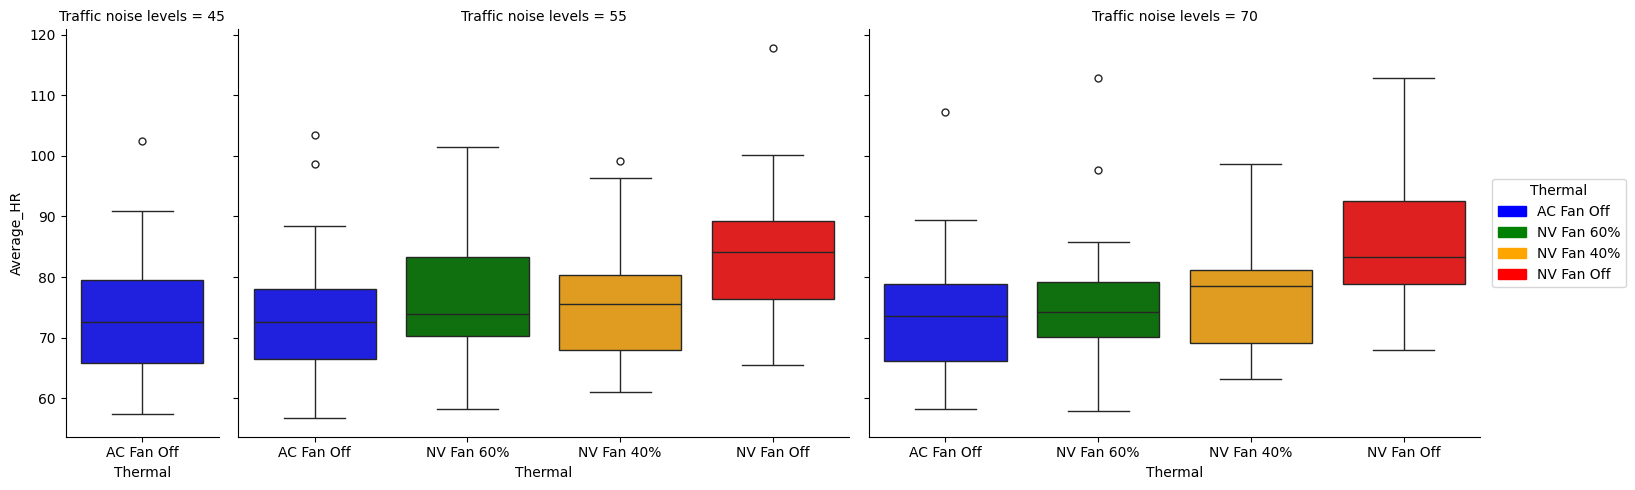

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

blue_patch = mpatches.Patch(color='blue', label="AC Fan Off")
green_patch = mpatches.Patch(color='green', label="NV Fan 60%")
orange_patch = mpatches.Patch(color='orange', label="NV Fan 40%")
red_patch = mpatches.Patch(color='red', label="NV Fan Off")

g = sns.catplot(
    data=data_v5, 
    x='Thermal', 
    y="Average_HR",
    col='Traffic noise levels', kind='box',
    palette=sns.color_palette(['blue','green','orange','red']),
    facet_kws={'gridspec_kws':{'width_ratios': [1, 4, 4]}},
    sharex=False,
    legend=False
)
for id, ax in enumerate(g.axes_dict.items()):
    #     print(id)
        if id == 0:
            ax[1].set_xticklabels(["AC Fan Off"])
        else:
            ax[1].set_xticklabels(["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"])
    
plt.legend(title='Thermal', loc='center right', labels=["AC Fan Off","NV Fan 60%", "NV Fan 40%", "NV Fan Off"], bbox_to_anchor=(1.25,.5), handles=[blue_patch, green_patch, orange_patch, red_patch])
plt.show(g)